In [1]:
% matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

languageFix = (lambda c:'English' if c == 'N/A (GQ/vacant)' 
                                       else 'Tagalog' if c == 'Filipino' 
                                       #else '"Chinese"' if c == 'Chinese' 
                                       else 'Mandarin' if c == 'Chinese'
                                       #else 'Chinese' if c == 'Cantonese' 
                                       #else 'Chinese' if c == 'Min Nan Chinese' 
                                       else 'Serbo-Croatian' if c == 'Serbian' 
                                       else 'Serbo-Croatian' if c == 'Croatian' 
                                       else 'Serbo-Croatian' if c == 'Bosnian' 
                                       else 'Serbo-Croatian' if c == 'Serbocroatian' 
                                       else c)

languageFix( ' -> Filipino'[4:])

'Tagalog'

In [2]:
HomeLang = pd.read_csv('data/home_language_NY_CA.csv', skiprows=3)
HomeLang.columns = ['col1', 'ppl']
HomeLang['geo'] = HomeLang.col1.apply(lambda c: c if c in ['New York', 'California'] else None)
HomeLang['lang'] = HomeLang.col1.apply(lambda c: None if c in ['New York', 'California'] 
                                       else  ' -> ' + languageFix(c[4:])).fillna(method='ffill')
HomeLang = HomeLang[~HomeLang.ppl.isnull()][['geo', 'lang', 'ppl']]
HomeLang['lang'] = HomeLang['lang'].apply(lambda s: s[4:])
HomeLang = HomeLang.groupby(['lang', 'geo'])['ppl'].sum().unstack().sort_values('New York', ascending=False)
HomeLang.columns = ['CA', 'NY']

HomeLang

,CA,NY
lang,,
English,22856501.0,14091692.0
Spanish,10525320.0,2818953.0
Mandarin,869584.0,477239.0
Russian,157294.0,221202.0
Italian,59371.0,164523.0
Haitian,8538.0,155232.0
Yiddish,2757.0,137544.0
French,128280.0,130911.0
Bengali,26613.0,119008.0


In [3]:
nycMicro = pd.read_csv('data/pums_micro_NYC.csv').drop('index', axis=1)
laMicro = pd.read_csv('data/pums_micro_LA.csv').drop('index', axis=1)

In [4]:
column = 'language'

nycMicro.language = nycMicro.language.apply(languageFix)

nyLang = nycMicro.groupby(column)[['PWGTP']].sum()
nyLang.index.name = 'lang'
nyLang.columns = ['NY']

laLang = laMicro.groupby(column)[['PWGTP']].sum()
laLang.index.name = 'lang'
laLang.columns = ['CA']


HomeLang = nyLang.join(laLang).sort_values('NY', ascending=False)

HomeLang

,NY,CA
lang,,
English,4566680,NaN
Spanish,1859891,3710621.0
Mandarin,406574,114590.0
Russian,193252,48963.0
Bengali,113003,15060.0
Haitian,99538,7745.0
Yiddish,99025,1617.0
Cantonese,91954,74388.0
French,75116,34057.0


In [5]:
Pivot = HomeLang[HomeLang.index != 'English'].copy()
#Pivot = Pivot[(Pivot.index != 'English')&(Pivot.index != 'Spanish')]

Pivot.loc['Tongan', 'NY'] = 1

Pivot['total'] = Pivot.sum(axis=1)

Pivot.CA = 100 * Pivot.CA / Pivot.CA.sum()
Pivot.NY = 100 * Pivot.NY / Pivot.NY.sum()

Pivot['skew'] = (Pivot.CA / Pivot.NY).apply(lambda x: math.log(x))
Pivot['ratio_ca'] = (Pivot.CA / Pivot.NY)
Pivot['ratio_ny'] = (Pivot.NY / Pivot.CA)

Pivot[Pivot.total>10000].sort_values('ratio_ca', ascending=False)#.sort_values('skew')

/usr/local/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


,NY,CA,total,skew,ratio_ca,ratio_ny
lang,,,,,,
Armenian,0.120502,3.304064,174322.0,3.311246,27.419266,0.036471
Farsi,0.204842,1.527346,86204.0,2.009048,7.456216,0.134116
Vietnamese,0.295019,1.763193,101722.0,1.787841,5.976534,0.167321
Khmer,0.093679,0.423313,25283.0,1.508234,4.518746,0.221300
Thai,0.158095,0.478971,30571.0,1.108441,3.029633,0.330073
Tagalog,1.423733,3.887073,253402.0,1.004374,2.730198,0.366274
Indonesian,0.090442,0.194200,13388.0,0.764174,2.147220,0.465719
Japanese,0.473967,0.920868,65184.0,0.664178,1.942893,0.514696
Korean,1.705805,3.248153,231203.0,0.644049,1.904176,0.525162


In [6]:
threshold = 0.1

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

t.sort_values('ratio_ca', ascending=False)

,NY,CA,total,skew,ratio_ca,ratio_ny
lang,,,,,,
Armenian,0.120502,3.304064,174322.0,3.311246,27.419266,0.036471
Farsi,0.204842,1.527346,86204.0,2.009048,7.456216,0.134116
Vietnamese,0.295019,1.763193,101722.0,1.787841,5.976534,0.167321
Khmer,0.093679,0.423313,25283.0,1.508234,4.518746,0.221300
Thai,0.158095,0.478971,30571.0,1.108441,3.029633,0.330073
Tagalog,1.423733,3.887073,253402.0,1.004374,2.730198,0.366274
Indonesian,0.090442,0.194200,13388.0,0.764174,2.147220,0.465719
Japanese,0.473967,0.920868,65184.0,0.664178,1.942893,0.514696
Korean,1.705805,3.248153,231203.0,0.644049,1.904176,0.525162


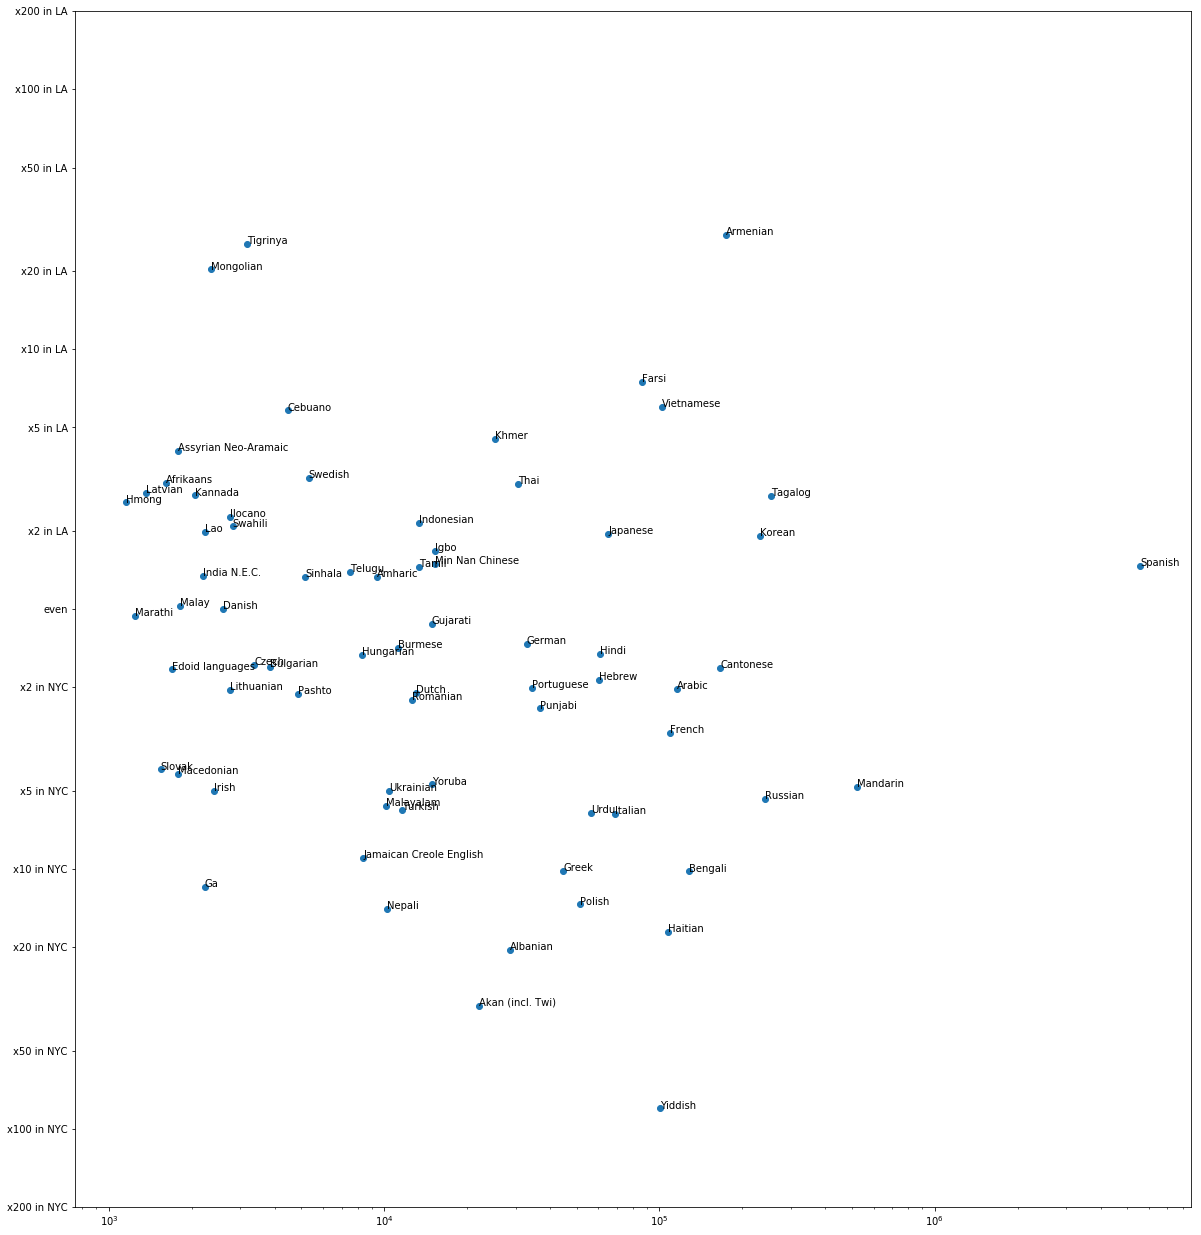

In [7]:
threshold = 0.01

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 1000)]

x = t['total']
y = t['skew']
n = list(t.reset_index().lang)

fig, ax = plt.subplots()
ax.scatter(x, y)

ticks = [2, 5, 10, 20, 50, 100, 200]

ax.set_yticks((list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks]))

ax.set_xscale('log')

fig.set_size_inches(20, 22)

ax.set_yticklabels((list(reversed(['x' + str(tk) + ' in NYC' for tk in ticks])) + ['even'] + ['x' + str(tk) + ' in LA' for tk in ticks]))

for i, txt in enumerate(n):
    #print txt, x[i], y[i]
    ax.annotate(txt, (x[i], y[i]))

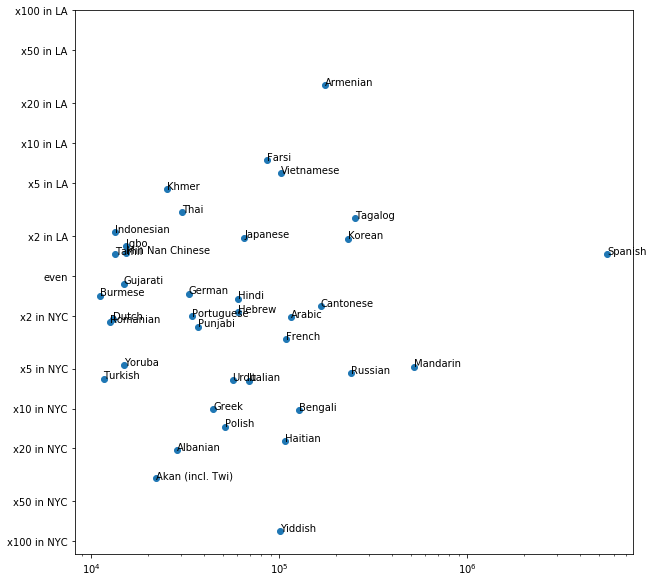

In [8]:
threshold = 0.1

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

x = t['total']
y = t['skew']
n = list(t.reset_index().lang)

fig, ax = plt.subplots()
ax.scatter(x, y)

ticks = [2, 5, 10, 20, 50, 100] #, 200]

ax.set_yticks((list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks]))

ax.set_xscale('log')

fig.set_size_inches(10, 10)

ax.set_yticklabels((list(reversed(['x' + str(tk) + ' in NYC' for tk in ticks])) + ['even'] + ['x' + str(tk) + ' in LA' for tk in ticks]))

for i, txt in enumerate(n):
    #print txt, x[i], y[i]
    ax.annotate(txt, (x[i], y[i]))

In [306]:
list(reversed([-math.log(x) for x in ticks])) + [0] + [math.log(x) for x in ticks]


[-6.907755278982137,
 -4.605170185988092,
 -3.912023005428146,
 -2.995732273553991,
 -2.302585092994046,
 -1.6094379124341003,
 -0.6931471805599453,
 0,
 0.6931471805599453,
 1.6094379124341003,
 2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 6.907755278982137]

In [319]:
(list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks])

[-6.214608098422191,
 -5.298317366548036,
 -4.605170185988092,
 -3.912023005428146,
 -2.995732273553991,
 -2.302585092994046,
 -1.6094379124341003,
 -0.6931471805599453,
 0,
 2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 5.298317366548036,
 6.214608098422191]

In [262]:
list(reversed(['x' + str(x) + ' in NY'  for x in [2, 5, 10, 20, 50, 100, 1000, 10000]])) + ['equal'] +  ['x' + str(x) + ' in CA'  for x in [2, 5, 10, 20, 50, 100, 1000, 10000]]

['x10000 in NY',
 'x1000 in NY',
 'x100 in NY',
 'x50 in NY',
 'x20 in NY',
 'x10 in NY',
 'x5 in NY',
 'x2 in NY',
 'equal',
 'x2 in CA',
 'x5 in CA',
 'x10 in CA',
 'x20 in CA',
 'x50 in CA',
 'x100 in CA',
 'x1000 in CA',
 'x10000 in CA']

In [250]:
def labelConvert(x):
    return int(math.exp(abs(x)))

[labelConvert(x.get_position()[1]) for x in ax.get_yticklabels()]

[99, 49, 19, 9, 4, 2, 1, 2, 4, 10, 19, 49, 100, 999, 10000]